In [1]:
import tensorflow as tf
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from Preprocessing import concatenate
from IPython.display import display, Image, SVG, Math, YouTubeVideo

## Build a one hidden layer Recurrent Neural Network

### Setup

In [62]:
node = [1,2,3,4,5,6,7,8,9,12,13]
start = datetime.datetime.strptime("2018-08-27", "%Y-%m-%d")
end = datetime.datetime.strptime("2018-10-02", "%Y-%m-%d")
date = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

### Data Loader (Cross Validation)

In [63]:
class Data:
    def __init__(self, batch_size = 20):
        self.odata = concatenate(date_list=date, node=node)
        self.data = None
        self.data_init()
        self.length = len(self.data)

        self.train_len = int(self.length * 0.8)
        self.val_len = int(self.length - self.train_len)

        self.index = None
        self.train_index = None
        self.train_pos = 0
        self.val_index = None
        self.val_pos = 0
        self.batch_size = batch_size

    def data_init(self):
        data = self.odata
        result = []
        start = 9
        for i in range(12):
            result.append(data[:, start:start + 4, :])
            start += 1
        self.data = np.array(result).reshape(-1, 4, 11)
        
    def reset_index(self):
        self.index = np.arange(self.length)
        
    def shuffle_index(self):
        self.train_pos = 0
        self.val_pos = 0
        np.random.shuffle(self.index)
        self.train_index = self.index[:self.train_len]
        self.val_index = self.index[self.train_len:]

    def get_train(self):
        train = self.data[self.train_index[self.train_pos:  self.train_pos + self.batch_size]][:, 0:-1]
        label = self.data[self.train_index[self.train_pos: self.train_pos + self.batch_size]][:, 1:]
        self.train_pos += self.batch_size
        
        return train, label

    def get_val(self):
        train = self.data[self.val_index[self.val_pos: self.val_pos + self.batch_size]][:, 0:-1]
        label = self.data[self.val_index[self.val_pos: self.val_pos + self.batch_size]][:, 1:]
        self.val_pos += self.batch_size

        return train, label

## Sample Data

In [77]:
print(a.odata[0].shape)
a.odata[0]

(24, 11)


array([[29, 27, 28, 27, 26, 26, 26, 25, 25, 25, 26],
       [26, 32, 58, 78, 77, 89, 86, 68, 61, 65, 65],
       [45, 34,  8,  6,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5, 10, 24, 50, 43, 35, 44, 42, 39],
       [32, 28, 17, 14,  2,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  0,  1,  1,  4,  8, 16, 17, 17, 16],
       [13, 15, 12,  9,  6,  4,  6,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  7, 11, 27, 39, 37],
       [35, 38, 35, 29, 29, 22, 12,  8,  9,  9, 10],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9, 11, 14],
       [21, 24, 23, 26, 25, 26, 25, 20, 13, 11, 11],
       [11, 11, 11, 11, 12, 12, 11, 11, 12, 12, 12],
       [15, 24, 47, 41, 40, 45, 34, 28, 24, 21, 16],
       [14, 14, 12, 11,  9, 10, 10,  9,  8,  9,  9],
       [ 9, 10, 16, 31, 59, 54, 52, 57, 54, 45, 37],
       [35, 23, 18,  4,  2,  3,  2,  2,  3,  2,  2],
       [ 2,  2,  3,  3,  5, 11, 19, 17, 17, 19, 17],
       [14, 12,  8,  7,  4,  5,  5,  5,  4,  4,  3],
       [ 3,  3,  3,  3,  3,  4,  7, 14, 21, 23

### Add Image

In [78]:
i = Image(filename='./pic1.png')
j = Image(filename='./pic2.png')
k = Image(filename='./pic3.png')

### RNN with 3 time step. Xt (batch_size, 11), h is the prediction at t

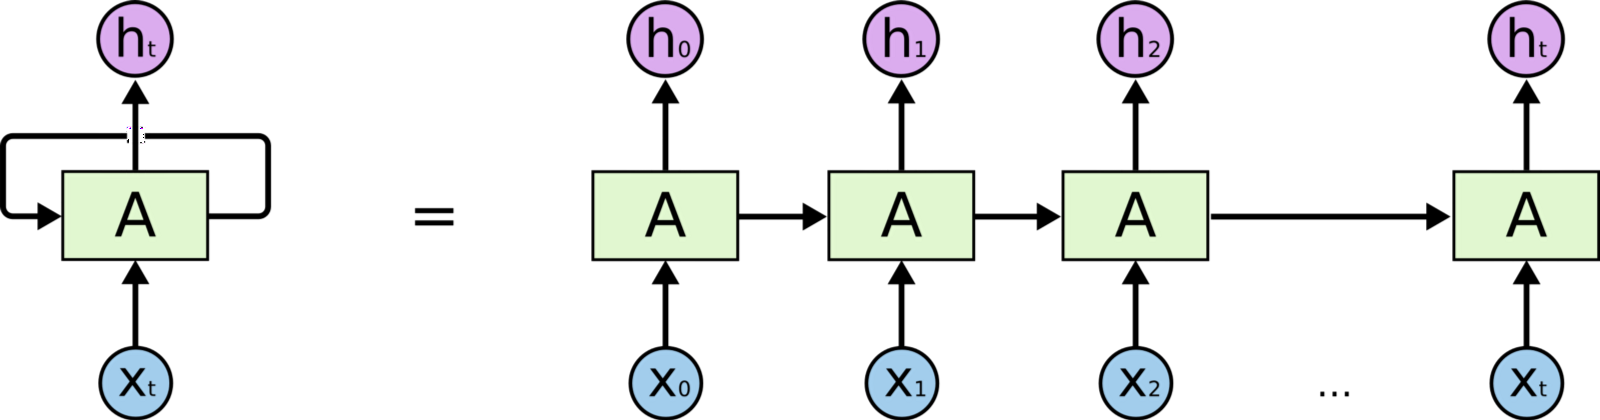

In [5]:
i

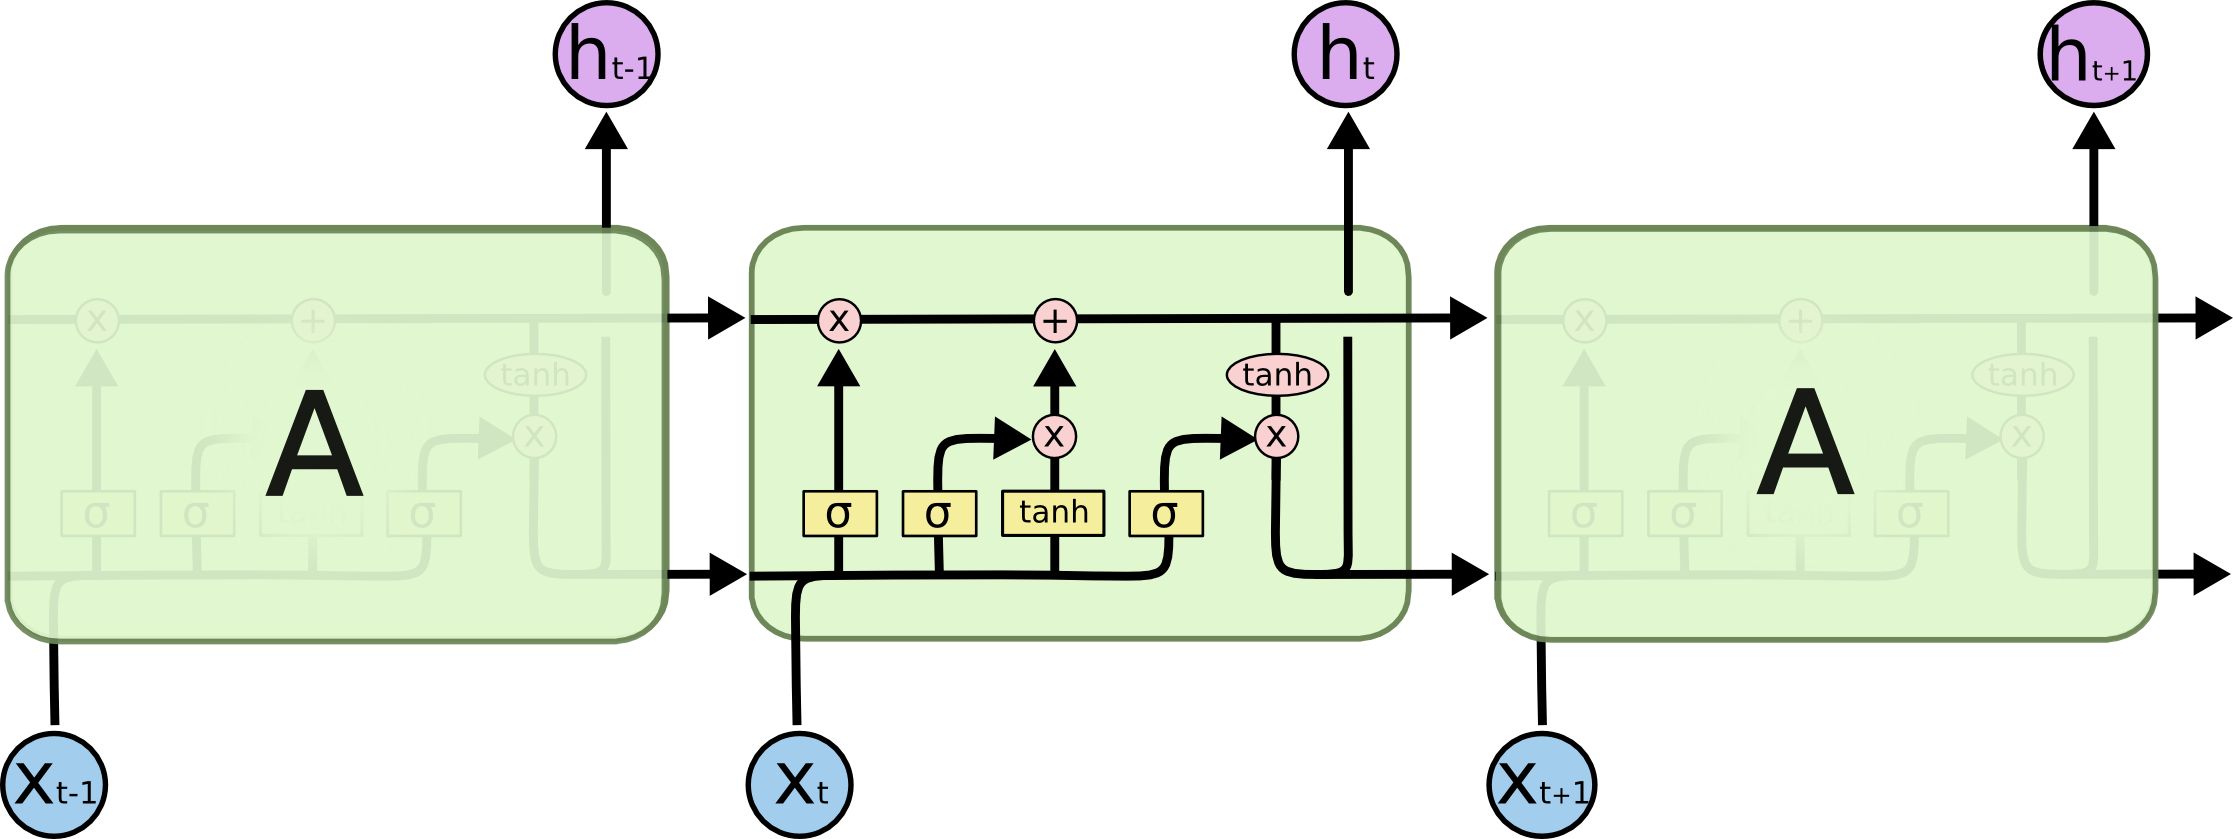

In [6]:
j

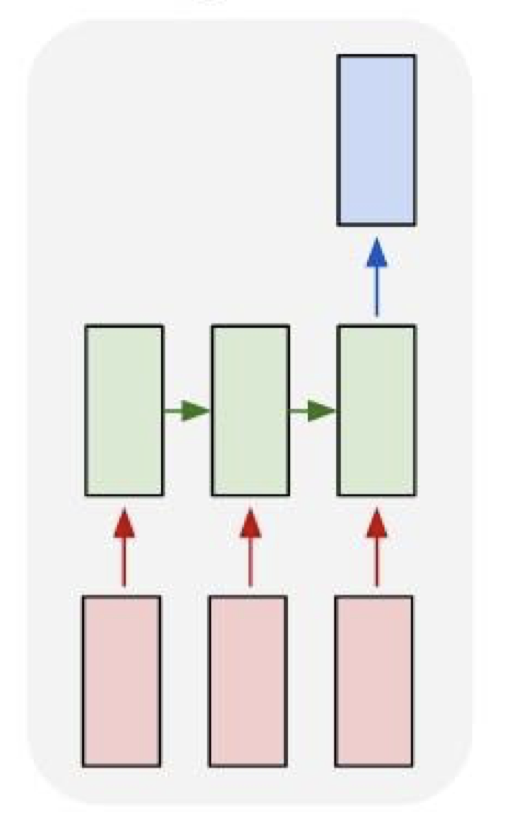

In [79]:
k

In [64]:
a = Data()

In [65]:
num_input = 11
num_time_step = 3
num_neuron_per_layer = 128
num_output = 11
learning_rate = 0.001
nepoches = 1000

tf.reset_default_graph()
X = tf.placeholder(dtype=tf.float32, shape=[None, num_time_step, num_input])
y = tf.placeholder(dtype=tf.float32, shape=[None, num_time_step, num_output])

cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neuron_per_layer, activation=tf.nn.relu), num_output)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
loss = tf.reduce_mean(tf.square(y - outputs))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
saver = tf.train.Saver()
a.reset_index()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(nepoches):
        iteration = a.train_len // a.batch_size
        a.shuffle_index()
        for i in range(iteration):
            x_batch, y_batch = a.get_train()
            sess.run(train, feed_dict={X:x_batch, y:y_batch})
        
        if epoch % 10 == 0:
            x_batch, y_batch = a.get_val()
            mse = loss.eval(feed_dict={X:x_batch, y:y_batch})
            print (epoch, "\tMSE:", mse)

    saver.save(sess, "./RNN_MODEL_V1")

0 	MSE: 285.64
10 	MSE: 62.6179
20 	MSE: 89.0484
30 	MSE: 28.6555
40 	MSE: 24.6257
50 	MSE: 22.3404
60 	MSE: 24.4474
70 	MSE: 29.9493
80 	MSE: 33.8114
90 	MSE: 18.0872
100 	MSE: 35.7757
110 	MSE: 13.718
120 	MSE: 22.2514
130 	MSE: 16.2853
140 	MSE: 22.3736
150 	MSE: 30.298
160 	MSE: 19.7092
170 	MSE: 18.7011
180 	MSE: 24.6392
190 	MSE: 19.3453
200 	MSE: 18.1758
210 	MSE: 17.4566
220 	MSE: 10.4321
230 	MSE: 9.78766
240 	MSE: 42.5952
250 	MSE: 18.8217
260 	MSE: 20.8185
270 	MSE: 20.1353
280 	MSE: 14.6072
290 	MSE: 11.9231
300 	MSE: 11.6719
310 	MSE: 16.5714
320 	MSE: 10.1494
330 	MSE: 23.3653
340 	MSE: 13.1831
350 	MSE: 7.00298
360 	MSE: 11.4613
370 	MSE: 13.3706
380 	MSE: 12.2054
390 	MSE: 10.6716
400 	MSE: 13.4219
410 	MSE: 14.4017
420 	MSE: 19.5198
430 	MSE: 14.9259
440 	MSE: 11.3812
450 	MSE: 10.8933
460 	MSE: 11.1398
470 	MSE: 10.4894
480 	MSE: 15.9362
490 	MSE: 11.5409
500 	MSE: 17.4558
510 	MSE: 8.17704
520 	MSE: 7.51782
530 	MSE: 7.57177
540 	MSE: 21.3212
550 	MSE: 10.4799
560 	M

In [66]:
pred_data = np.load("./data/2018-10-02.npy")

In [67]:
pred_data = pred_data.reshape(24, -1)

In [68]:
init_data = pred_data[9:12]

### Prediction

In [69]:
with tf.Session() as sess:
    saver.restore(sess, "./RNN_MODEL_V1")
    input_data = list(init_data)
    for i in range(14):
        x_batch = np.array(input_data[-3:]).reshape(1, num_time_step, 11)
        y_pred = sess.run(outputs, feed_dict={X:x_batch})
        input_data.append(y_pred[0][2])
np.array(input_data).astype(int)

INFO:tensorflow:Restoring parameters from ./RNN_MODEL_V1


array([[ 10,   9,   9,   9,   9,   9,   9,   9,   9,   9,  12],
       [ 22,  25,  43,  35,  33,  19,  20,  25,  22,  31,  30],
       [ 20,  18,  14,  13,  12,  13,  12,  11,  12,  11,  12],
       [ 17,  25,  29,  34,  38,  42,  46,  53,  59,  39,  33],
       [ 31,  43,  28,  18,  15,  11,  10,  12,  15,   9,   8],
       [  0,   1,   0,   8,  22,  18,  17,  18,  46,  62,  75],
       [ 74,  63,  31,  12,   9,  -6,  -8,  10,  13,  -3,  -5],
       [  8,  -2,  -1,  11,  16,  18,  19,  28,  33,  36,  54],
       [ 66,  58,  69,  37,  26,  29,  33,  36,  37,  26,   3],
       [  9,   9,  -2,  -6,  -7, -10,   7,  13,  22,  36,  59],
       [ 59,  72,  76,  68,  74,  35,  30,  62,  59,  23,   1],
       [ 12,   6,   7,   6,   3,  -8,  -2,   1, -13,  -6,  20],
       [ 54,  50,  59,  47,  61,  75,  49,  41,  42,  28,  10],
       [ 10,  32,  22,   9,  13,   8,   0,  10,   7, -13, -14],
       [  7,  20,  34,  43,  35,  43,  64,  31,  10,  41,  27],
       [ 17,  11,  12,  12,  14,   5,   

In [70]:
pred_data[9:]

array([[10,  9,  9,  9,  9,  9,  9,  9,  9,  9, 12],
       [22, 25, 43, 35, 33, 19, 20, 25, 22, 31, 30],
       [20, 18, 14, 13, 12, 13, 12, 11, 12, 11, 12],
       [15, 26, 45, 62, 76, 64, 60, 69, 62, 51, 42],
       [35, 24, 22, 19,  9,  6,  8,  8,  8,  7,  7],
       [ 8, 10, 12, 19, 47, 57, 65, 73, 84, 83, 77],
       [67, 42, 28, 11,  9,  4,  1,  1,  1,  2,  1],
       [ 1,  1,  1,  1,  3,  5, 11, 15, 18, 14, 18],
       [14, 17, 13,  9,  9, 13,  9,  9,  7,  6,  7],
       [ 5,  2,  2,  2,  2,  2,  9, 19, 28, 36, 41],
       [41, 41, 45, 42, 35, 22, 21, 41, 20, 15,  9],
       [ 8,  7,  7,  6,  6,  7,  7,  7,  9, 17, 20],
       [19, 25, 28, 35, 49, 48, 38, 29, 28, 24, 19],
       [14,  9,  1,  1,  2,  2,  2,  1,  2,  3, 14],
       [24, 56, 63, 53, 62, 60, 41, 39, 29, 21, 22]])